In [29]:
# Multivalent Linear Regression

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Real Estate Dataset with Multivalent Linear Regression Ridge and Lasso

# Importing the dataset
df = pd.read_csv('../data/real_estate.csv')
df.info()

In [31]:
# Split the data into features (X) and target (Y)
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
Y = df['Y house price of unit area']

In [32]:
# Normalize the features (standardize them)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
# Create a simple regression model in TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer (single neuron for regression)
])

In [35]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=1000, validation_data=(X_test, Y_test))

In [ ]:
# Evaluate the model
test_loss = model.evaluate(X_test, Y_test)
print(f'Test loss: {test_loss}')

In [ ]:
# Making predictions
predictions = model.predict(X_test)
print(predictions[:5])  # Preview the first 5 predictions

In [ ]:
history = model.fit(X_train, Y_train, epochs=1000, validation_data=(X_test, Y_test))

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Predict on the test set
predictions = model.predict(X_test)

# Plot actual vs predicted house prices
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual House Price of Unit Area')
plt.ylabel('Predicted House Price of Unit Area')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/200


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1687.9658 - val_loss: 1418.0060
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1512.6573 - val_loss: 1342.9756
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1449.7678 - val_loss: 1239.6470
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1381.1010 - val_loss: 1100.1610
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1201.4548 - val_loss: 922.1367
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 975.4375 - val_loss: 711.2302
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 727.9873 - val_loss: 487.8591
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 477.0959 - val_loss: 290.3494
Epoch 9/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 248.6243 - val_loss: 159.8958
Epoch 10/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 150.8669 - val_loss: 102.7428
Epoch 11/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 131.2660 - val_loss: 86.5440
Epoch 12/200
11/11 ━━━

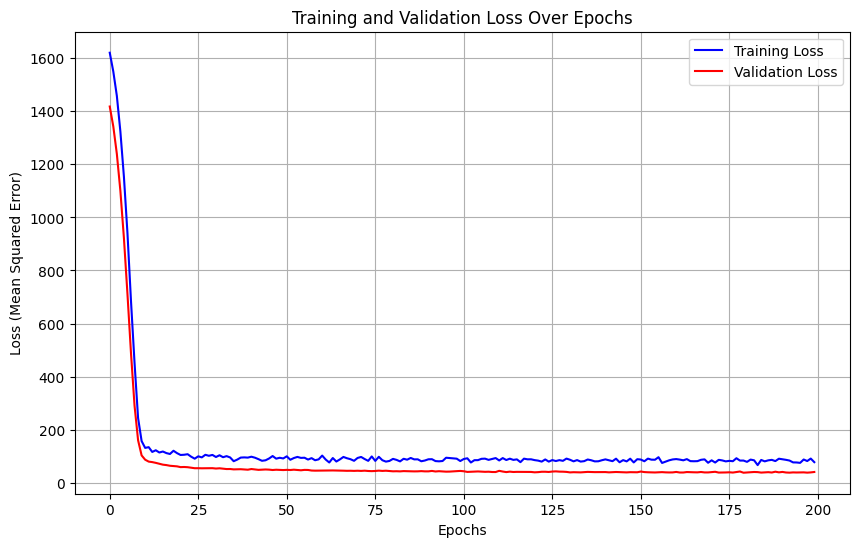

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.4979 
Test loss: 40.23506164550781
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


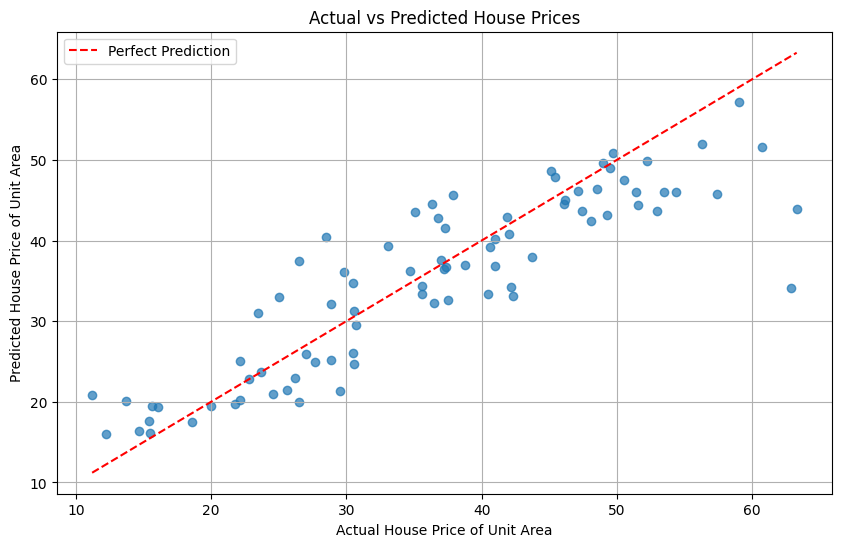

In [4]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/real_estate.csv')

# Split the data into features (X) and target (Y)
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
Y = df['Y house price of unit area']

# Normalize the features (standardize them)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Build a deeper neural network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)  # Output layer (single neuron for regression)
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(X_train, Y_train, epochs=200, validation_data=(X_test, Y_test), batch_size=32)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, Y_test)
print(f'Test loss: {test_loss}')

# Predict on the test set
predictions = model.predict(X_test)

# Plot actual vs predicted house prices
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], 'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual House Price of Unit Area')
plt.ylabel('Predicted House Price of Unit Area')
plt.legend()
plt.grid(True)
plt.show()


<Axes: >

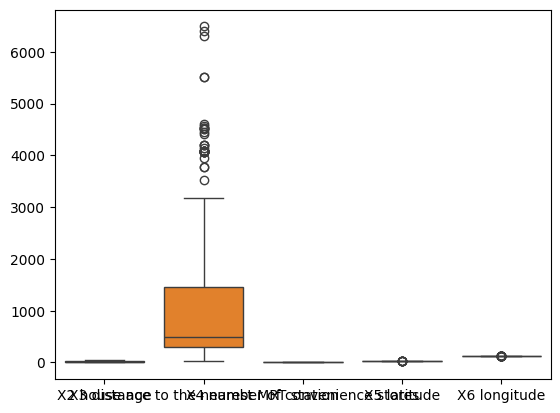

In [3]:
import seaborn as sns
sns.boxplot(data=df[['X2 house age', 'X3 distance to the nearest MRT station', 
                     'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']])
